# 实验三

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt
import ysy_plot_utils as ypu
from scipy.signal import savgol_filter

500
[600, 635, 770, 1200]


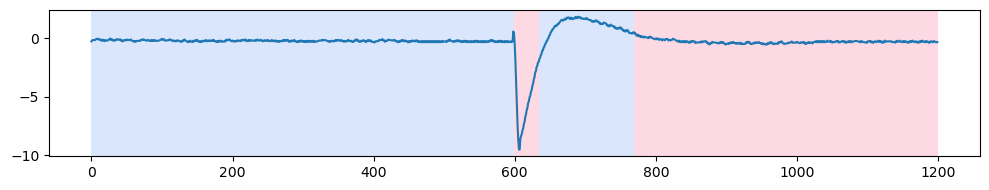

600
[600, 635, 775, 1200]


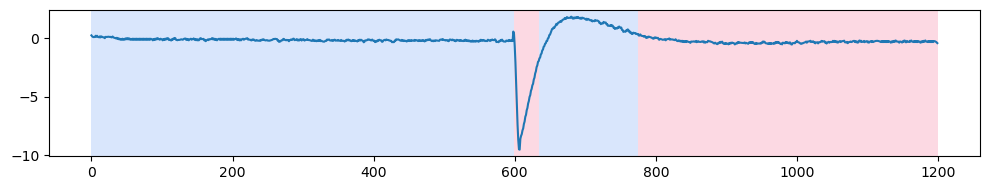

700
[600, 635, 775, 1200]


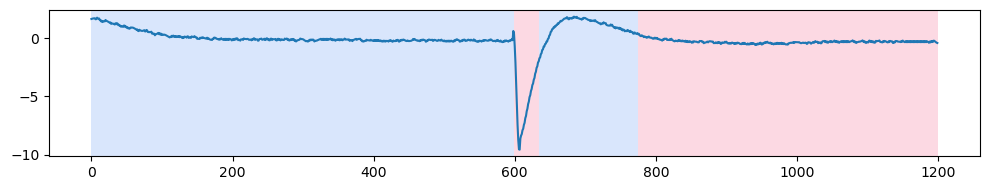

800
[600, 635, 795, 1200]


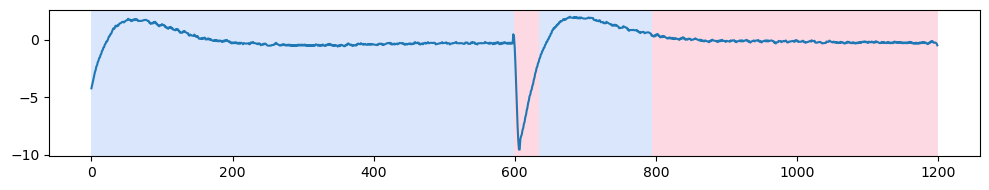

900
[300, 815, 840, 1200]


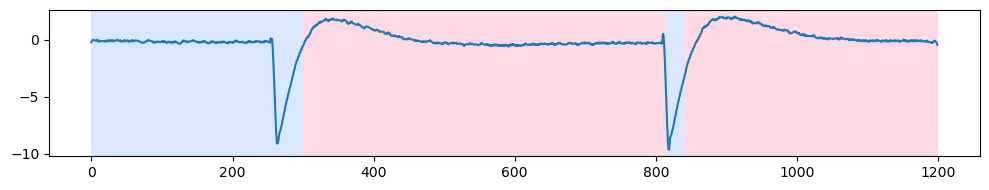

1000
[145, 600, 630, 1200]


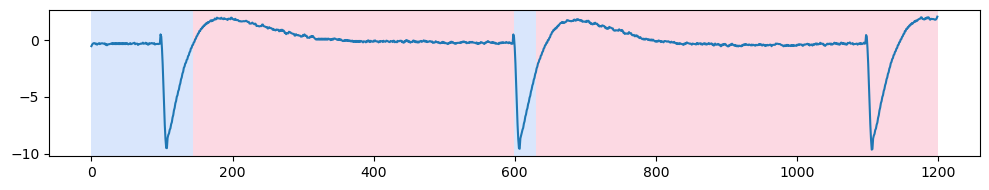

In [2]:
data_set = []
x_set = []
y_set = []

for i in [500 ,600, 700, 800, 900, 1000]:
    data_set.append(pd.read_csv(str(i) + 'mHz.csv', skiprows=1))

i = 500
for data in data_set:
    x = data['Sequence'].values
    y = savgol_filter(data['Volt.1'].values, 11, 3)
    algo = rpt.Dynp(model="l2").fit(y)
    result = algo.predict(n_bkps=3)
    print(i)
    print(result)
    rpt.display(y, result)
    plt.show()
    i = i + 100

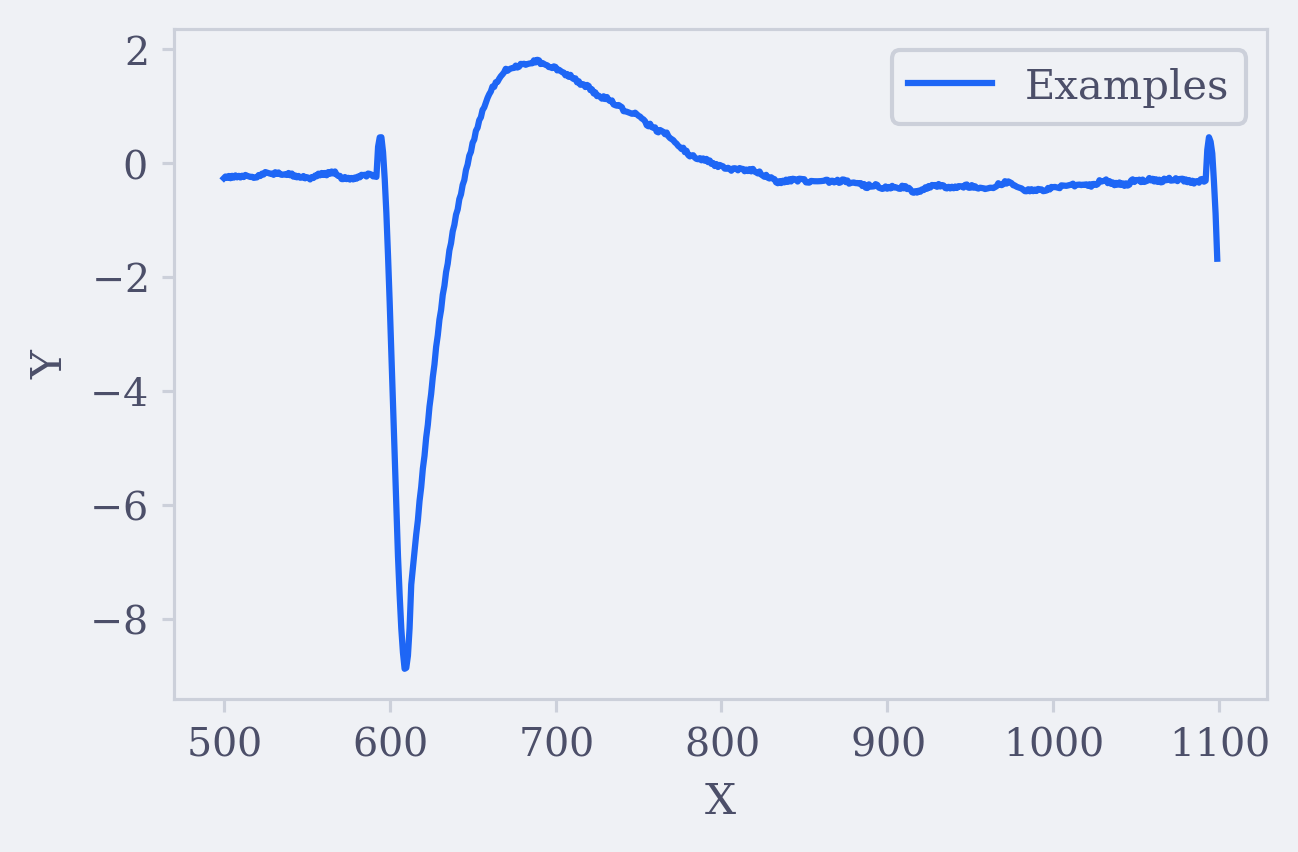

In [38]:
edata = data_set[5]
x = edata['Sequence'].values[500:1100]
y = savgol_filter(edata['Volt.1'].values, 21, 3)[500:1100]
with ypu.temp_style(["ysy_academic", "catppuccin_latte"]):
    ypu.plot(x, y, 'Examples')

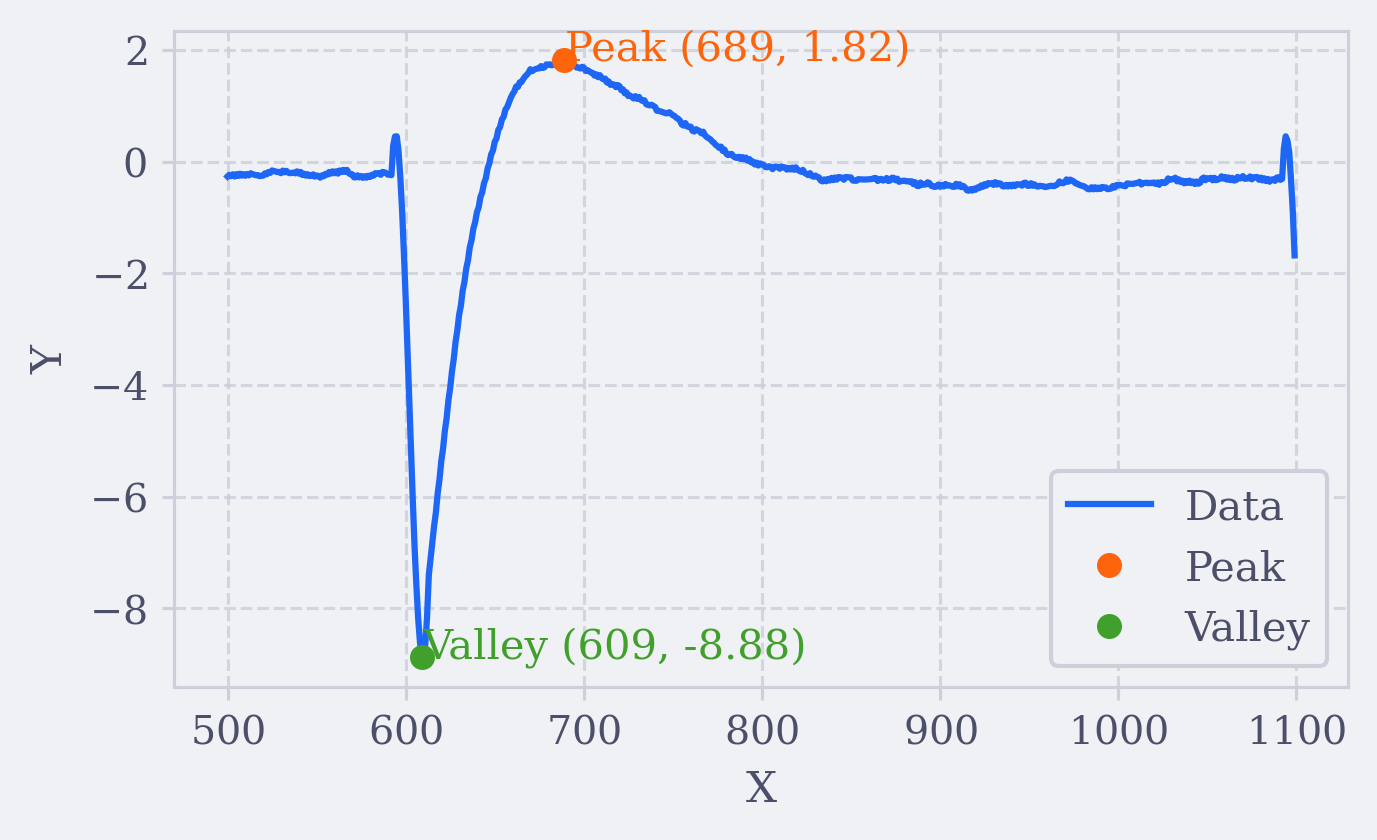

In [34]:
from scipy.signal import find_peaks

# --- 寻找峰 ---
peaks, _ = find_peaks(y, prominence=0.3)  # prominence 控制“显著程度”
# 只取最显著的一个峰
if len(peaks) > 0:
    peak_index = peaks[np.argmax(y[peaks])]
else:
    peak_index = None

# --- 寻找谷（通过找 -y 的峰）---
valleys, _ = find_peaks(-y, prominence=0.3)
# 只取最显著的一个谷
if len(valleys) > 0:
    valley_index = valleys[np.argmin(y[valleys])]
else:
    valley_index = None

# --- 绘图 ---
with ypu.temp_style(["ysy_academic", "catppuccin_latte"]):
    plt.figure()
    plt.plot(x, y, label='Data')

    # 标出峰
    if peak_index is not None:
        plt.plot(x[peak_index], y[peak_index], 'o', label='Peak', color='C1')
        plt.annotate('Peak ('+ str(x[peak_index]) + ', ' + str(round(y[peak_index], 2)) + ')', xy=(x[peak_index], y[peak_index]), xytext=(x[peak_index]+0.2, y[peak_index]), color='C1')

    # 标出谷
    if valley_index is not None:
        plt.plot(x[valley_index], y[valley_index], 'o', label='Valley', color='C2')
        plt.annotate('Valley ('+ str(x[valley_index]) + ', ' + str(round(y[valley_index], 2)) + ')', xy=(x[valley_index], y[valley_index]), xytext=(x[valley_index]+0.2, y[valley_index]), color='C2')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

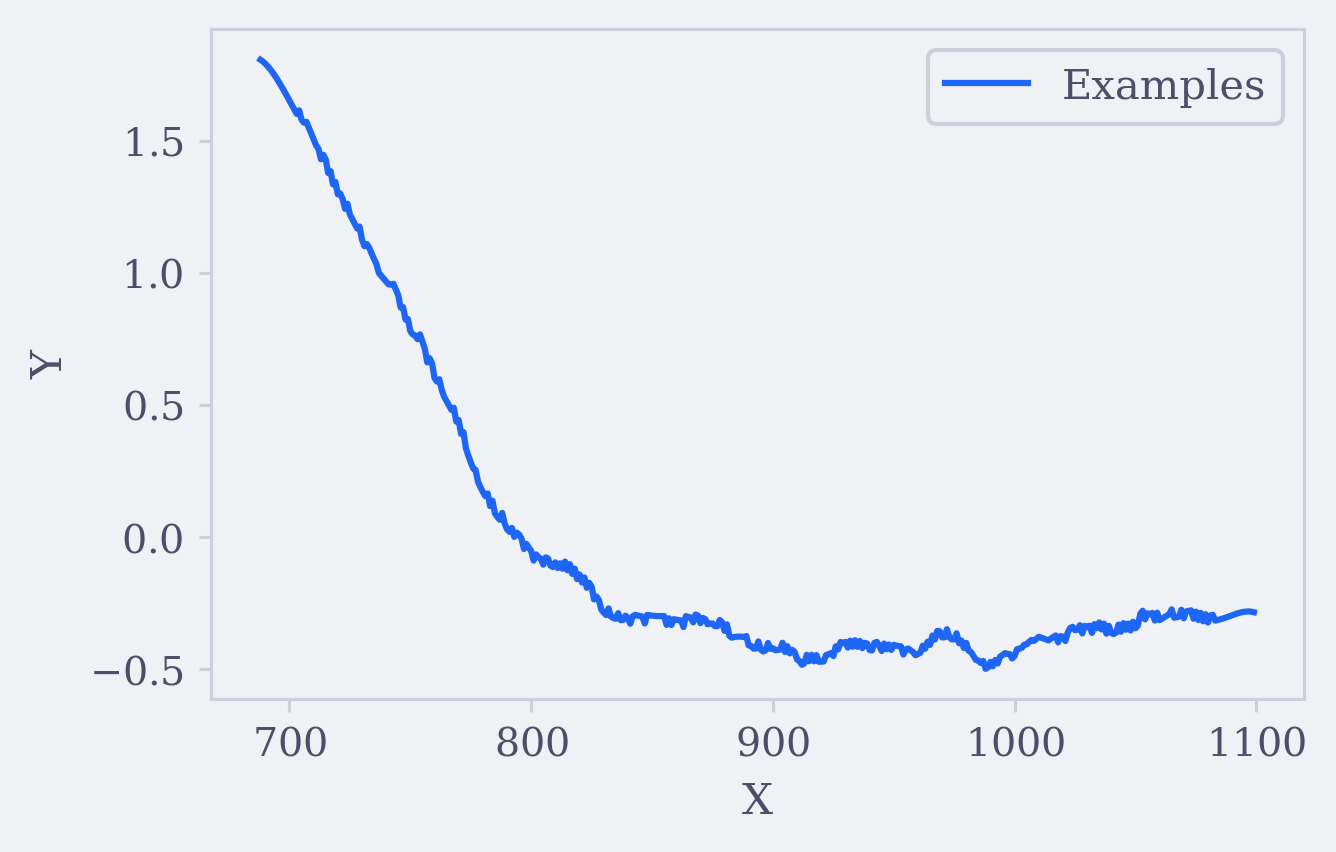

In [35]:
x0 = edata['Sequence'].values[688:1100]
y0 = savgol_filter(edata['Volt.1'].values[688:1100], 31, 3)
with ypu.temp_style(["ysy_academic", "catppuccin_latte"]):
    ypu.plot(x0, y0, 'Examples')

/var/folders/7l/1kcst3m15b3f1jyrwvsyrckw0000gn/T/ipykernel_79793/3159032073.py:4: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-B * x) + C
/var/folders/7l/1kcst3m15b3f1jyrwvsyrckw0000gn/T/ipykernel_79793/3159032073.py:4: RuntimeWarning: overflow encountered in multiply
  return A * np.exp(-B * x) + C


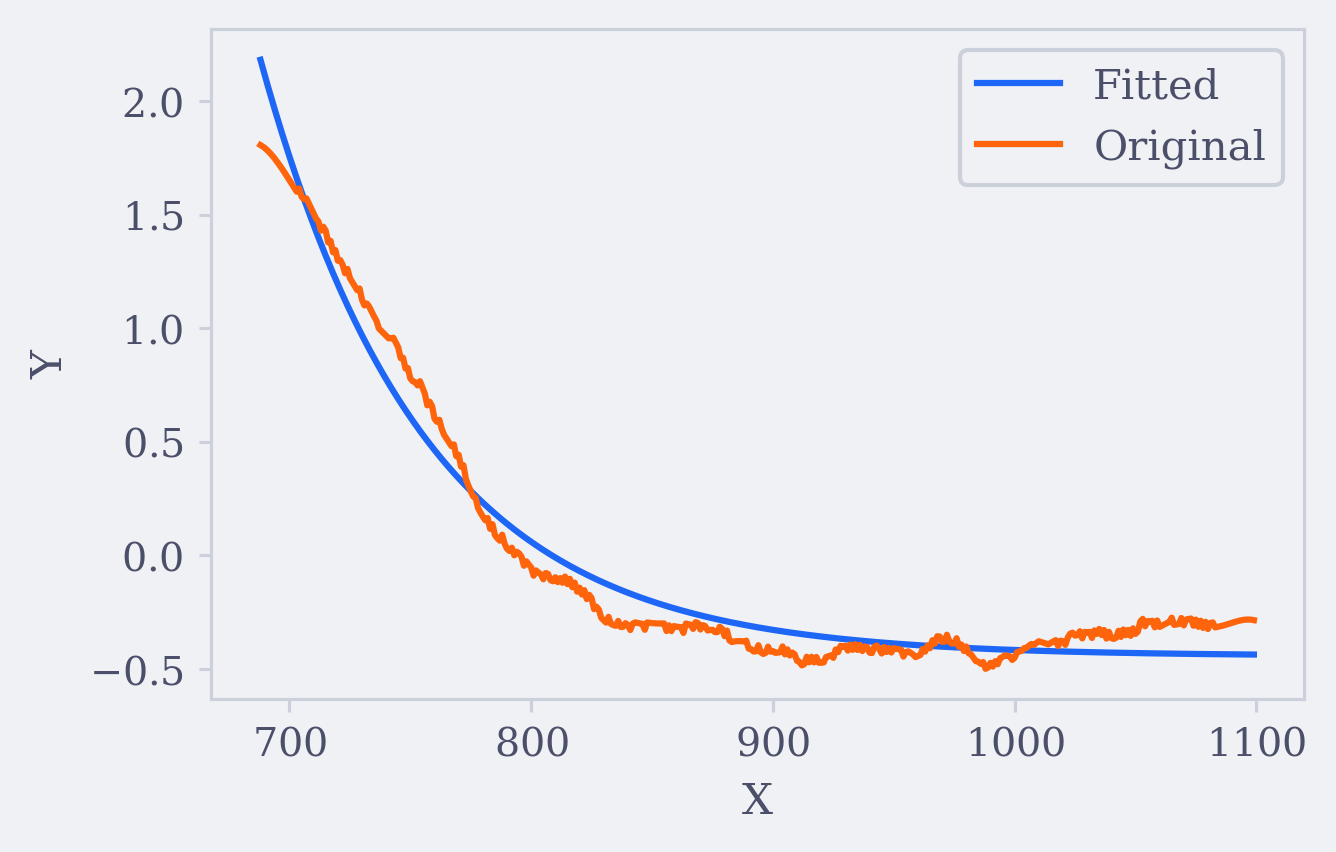

[ 6.77466578e+04  1.47654435e-02 -4.42728037e-01]


In [36]:
from scipy.optimize import curve_fit

def exp_func(x, A, B, C):
    return A * np.exp(-B * x) + C

p0 = [y0[0], 1/50, y0[-1]]  # [A, B, C]
params, _ = curve_fit(exp_func, x0, y0, p0=p0)
A_fit, B_fit, C_fit = params
y_pred = exp_func(x0, *params)

with ypu.temp_style(["ysy_academic", "catppuccin_latte"]):
    ypu.plot(
        x0, (y_pred, y0), ('Fitted', 'Original')
    )
print(params)

**记录：**

1.57458916e-02  
1.38703502e-02  
1.47160258e-02  
1.09938698e-02  
1.39358561e-02  
1.47654435e-02

# 实验四

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ysy_plot_utils as ypu

In [19]:
data = pd.read_excel('Exp4.xlsx')
I = data['电流I'].values
N = 250
r = 0.2373
B0 = 16 * np.pi * N * I * 1e-7 / ((5**(3/2)) * r)

In [20]:
V1 = data['v_1_85'].values
V2 = data['v_1_87'].values
V3 = data['v_2_85'].values
V4 = data['v_2_87'].values
V_set = [V1, V2, V3, V4]
f_label_set = ['v_1_85', 'v_1_87', 'v_2_85', 'v_2_87']
f1 = (V1 + V3) / 2
f2 = (V2 + V4) / 2
f_set = [f1 ,f2]

=== f1 ===

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.351e+05
Date:                Thu, 22 May 2025   Prob (F-statistic):           3.29e-10
Time:                        17:16:39   Log-Likelihood:                -4.8453
No. Observations:                   6   AIC:                             13.69
Df Residuals:                       4   BIC:                             13.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3278      1.374     -4.

/Users/yangshuyun/anaconda3/envs/dplab/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


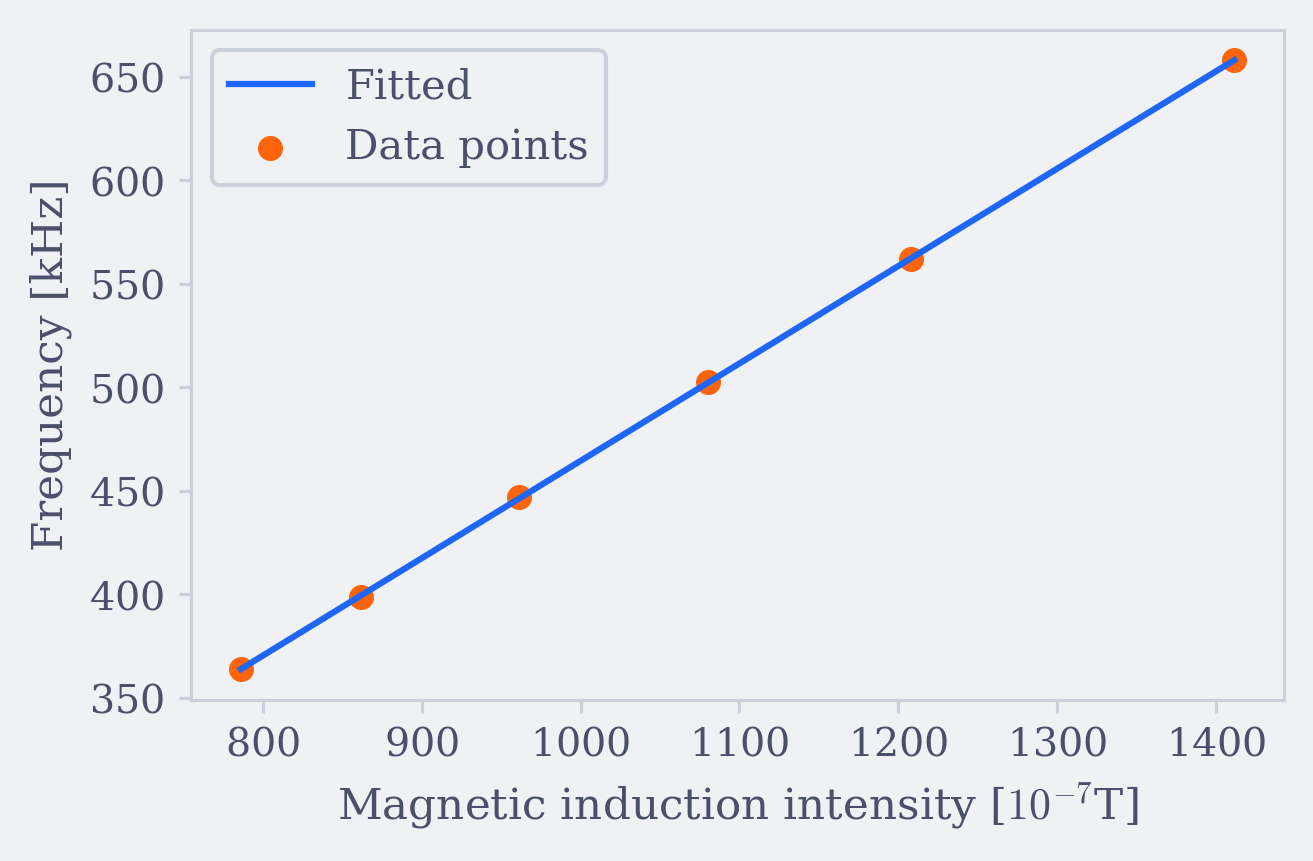

=== f2 ===

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.993e+04
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.23e-09
Time:                        17:16:39   Log-Likelihood:                -9.2207
No. Observations:                   6   AIC:                             22.44
Df Residuals:                       4   BIC:                             22.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9025      2.849     -2.

/Users/yangshuyun/anaconda3/envs/dplab/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


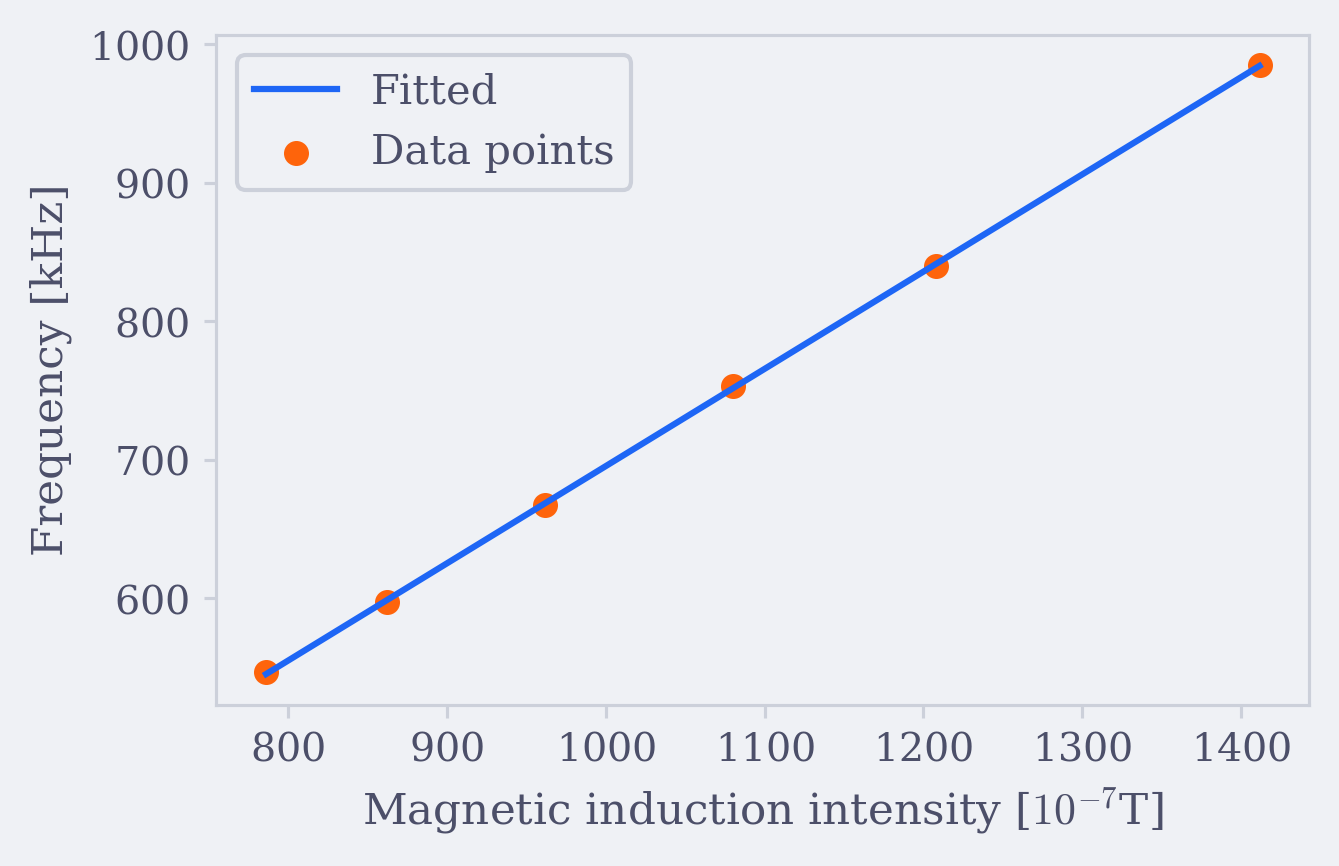

In [24]:
import statsmodels.api as sm
from scipy.constants import physical_constants

mu_B = physical_constants["Bohr magneton"][0]
from scipy.constants import h

X = sm.add_constant(B0)
for i in [1, 2]:
    f = f_set[i-1]
    V = f
    model = sm.OLS(V, X)
    fit_result = model.fit()
    print('=== f'+str(i)+' ===')
    print()
    print(fit_result.summary())
    print()
    params = fit_result.params         # 参数值（截距、斜率）
    params_std = fit_result.bse        # 参数标准误差
    conf_int = fit_result.conf_int()    # 置信区间
    print("参数估计：", params)
    print("参数标准误差：", params_std)
    print("参数置信区间：", conf_int)
    print('=== === ===')
    x_fit = np.linspace(np.min(B0), np.max(B0), 200)
    X_fit = sm.add_constant(x_fit)  # 记得加截距列
    y_fit = fit_result.predict(X_fit)
    gF = params[1] * h / mu_B * 1000
    gF_err = params_std[1] * h / mu_B * 1000
    print('=> gF')
    print(gF)
    print(gF_err)

    # 绘制原始数据和拟合曲线
    with ypu.temp_style(["ysy_academic", "catppuccin_latte"]):
        plt.figure()
        plt.plot(x_fit*1e7, y_fit, label='Fitted')
        plt.scatter(B0*1e7, V, color='C1', label='Data points')
        plt.legend()
        plt.xlabel('Magnetic induction intensity [$10^{-7}$T]')
        plt.ylabel('Frequency [kHz]')
        plt.show()

# 实验5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ysy_plot_utils as ypu

In [3]:
data = pd.read_csv('apl2_3_data_5.csv')
x = data['水平加(A)'].values
f87 = data['V1^87 (K)'].values + data['V2^87 (K)'].values
f85 = data['V1^85 (K)'].values + data['V2^85 (K)'].values
f_set = [f87, f85]

In [4]:
N = 250
r = 0.2373
B = 16 * np.pi * N * x * 1e-7 / ((5**(3/2)) * r)

=== f1 ===

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1711.
Date:                Fri, 23 May 2025   Prob (F-statistic):           2.04e-06
Time:                        10:53:17   Log-Likelihood:                -19.799
No. Observations:                   6   AIC:                             43.60
Df Residuals:                       4   BIC:                             43.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -479.7210     33.076    -14.

/Users/yangshuyun/anaconda3/envs/dplab/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


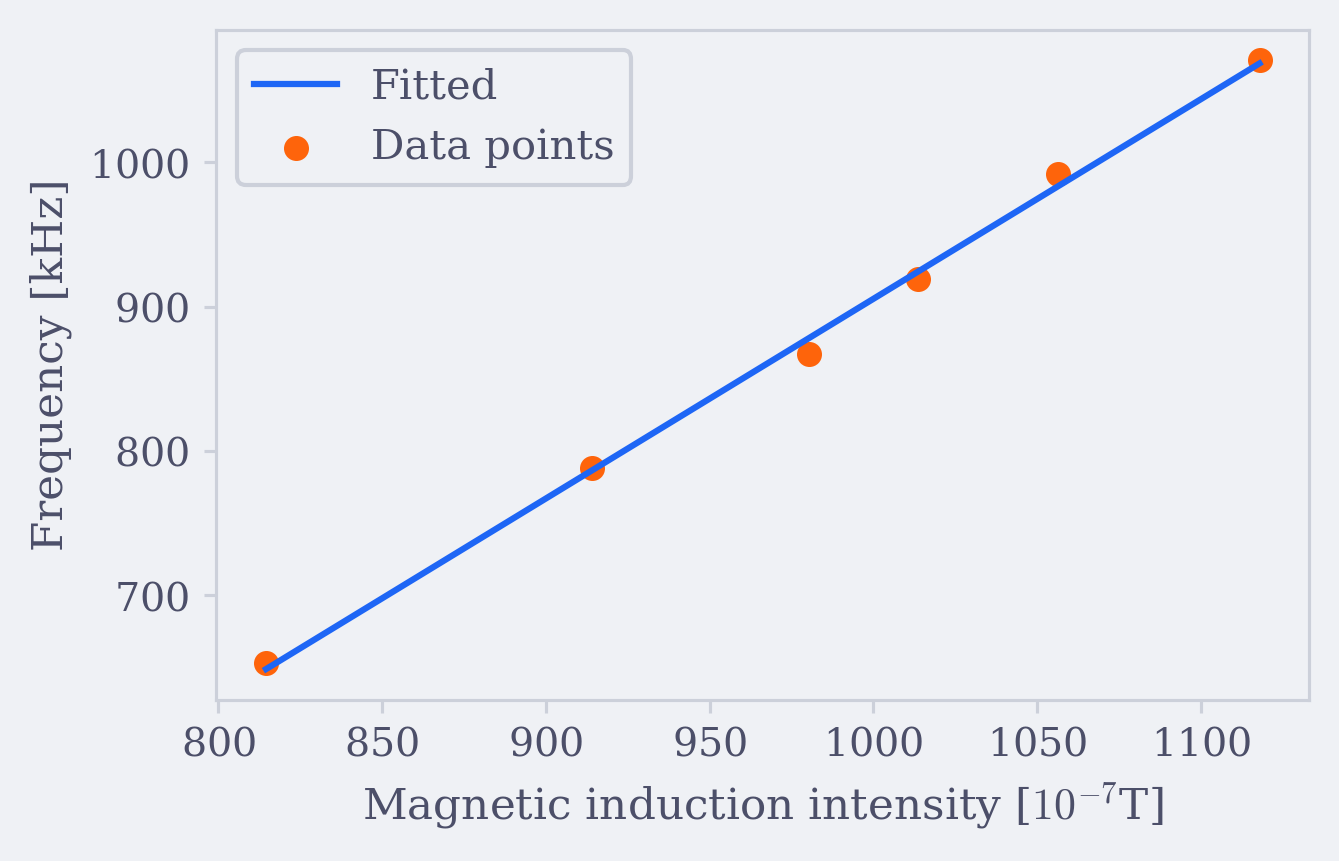

=== f2 ===

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1602.
Date:                Fri, 23 May 2025   Prob (F-statistic):           2.33e-06
Time:                        10:53:17   Log-Likelihood:                -17.522
No. Observations:                   6   AIC:                             39.04
Df Residuals:                       4   BIC:                             38.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -312.0943     22.628    -13.

/Users/yangshuyun/anaconda3/envs/dplab/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


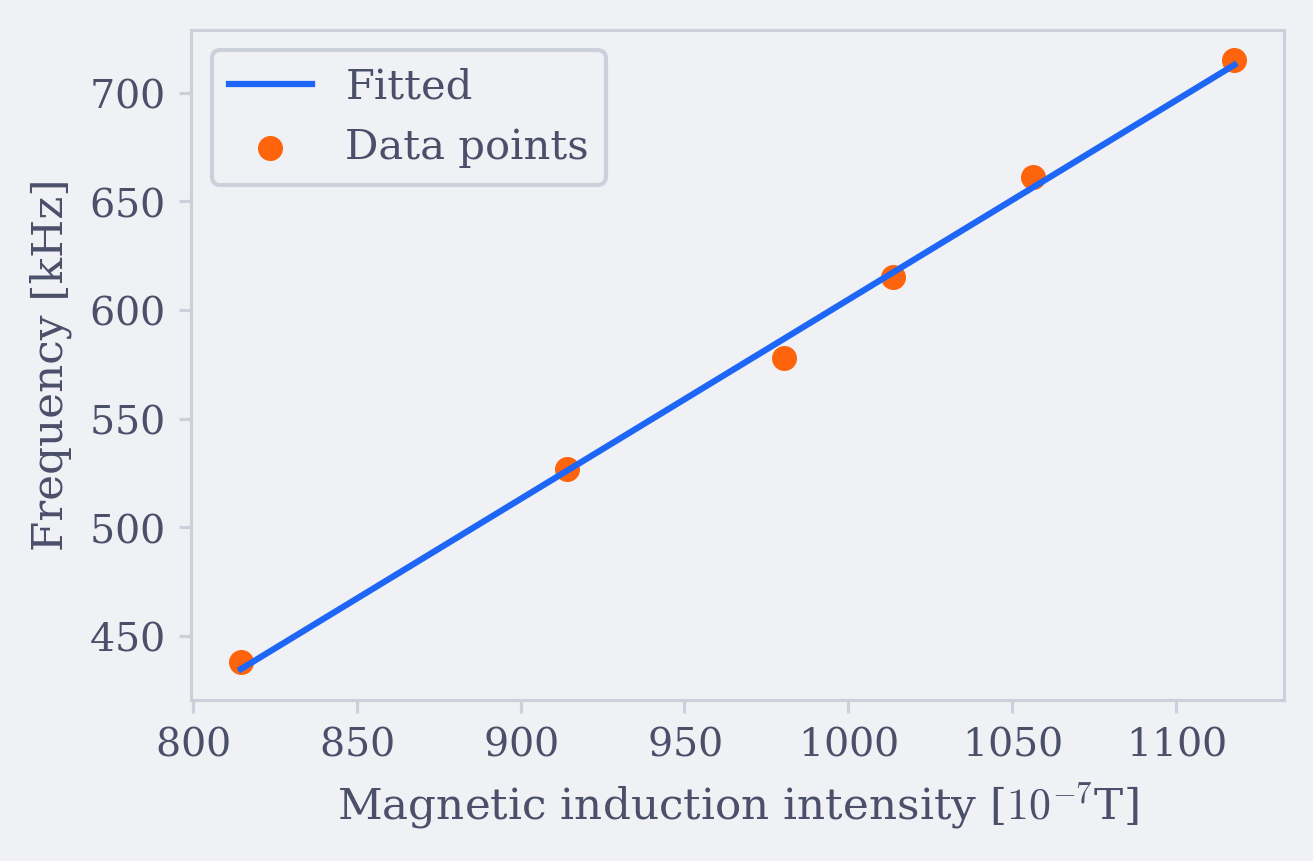

In [7]:
import statsmodels.api as sm
from scipy.constants import physical_constants

mu_B = physical_constants["Bohr magneton"][0]
from scipy.constants import h

X = sm.add_constant(B)
for i in [1, 2]:
    f = f_set[i-1]
    V = f
    model = sm.OLS(V, X)
    fit_result = model.fit()
    print('=== f'+str(i)+' ===')
    print()
    print(fit_result.summary())
    print()
    params = fit_result.params         # 参数值（截距、斜率）
    params_std = fit_result.bse        # 参数标准误差
    conf_int = fit_result.conf_int()    # 置信区间
    print("参数估计：", params)
    print("参数标准误差：", params_std)
    print("参数置信区间：", conf_int)
    print('=== === ===')
    x_fit = np.linspace(np.min(B), np.max(B), 200)
    X_fit = sm.add_constant(x_fit)  # 记得加截距列
    y_fit = fit_result.predict(X_fit)
    m = -params[0] / params[1]
    print('水平地磁场')
    print(m)
    print('=== === ===')


    # 绘制原始数据和拟合曲线
    with ypu.temp_style(["ysy_academic", "catppuccin_latte"]):
        plt.figure()
        plt.plot(x_fit*1e7, y_fit, label='Fitted')
        plt.scatter(B*1e7, V, color='C1', label='Data points')
        plt.legend()
        plt.xlabel('Magnetic induction intensity [$10^{-7}$T]')
        plt.ylabel('Frequency [kHz]')
        plt.show()

In [13]:
B_xy = (3.404010105894424e-05 + 3.4632363037946815e-05) / 2
B_z = 0.041 * 16 * np.pi * 100 * 1e-7 / ((5**(3/2)) * 0.1530)
B_earth = np.sqrt(B_xy**2 + B_z**2)
print(B_earth * 1e6, 'mT')

36.3885421369741 mT


In [14]:
theta = np.arctan(B_z / B_xy) * 180 / np.pi
print(theta, 'degree')

19.3347879068293 degree


# 实验6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ysy_plot_utils as ypu

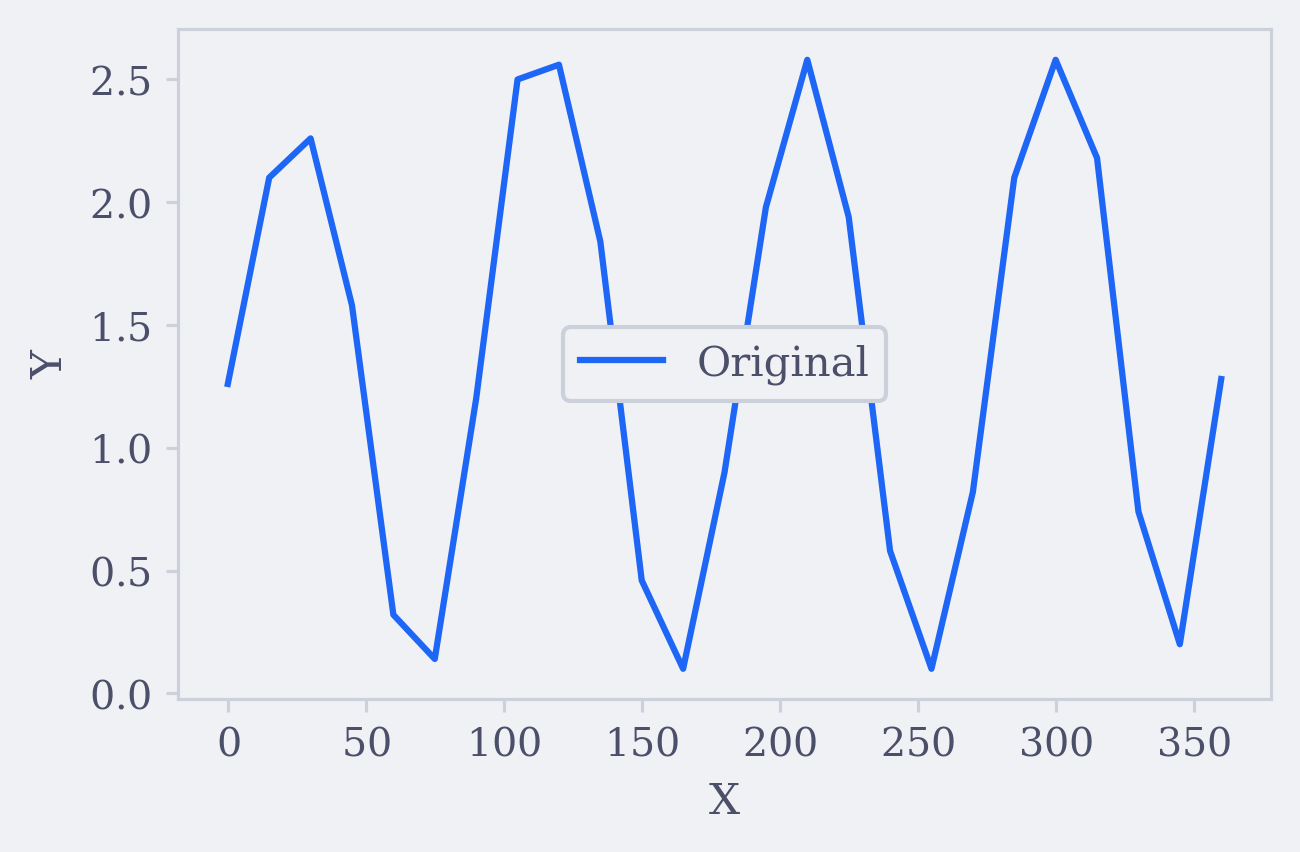

In [2]:
data = pd.read_excel('工作簿1.xlsx', header=None)
x1 = data[0].values[0:25]
y1 = data[1].values[0:25]
with ypu.temp_style(["ysy_academic", "catppuccin_latte"]):
    ypu.plot(x1, y1, 'Original')

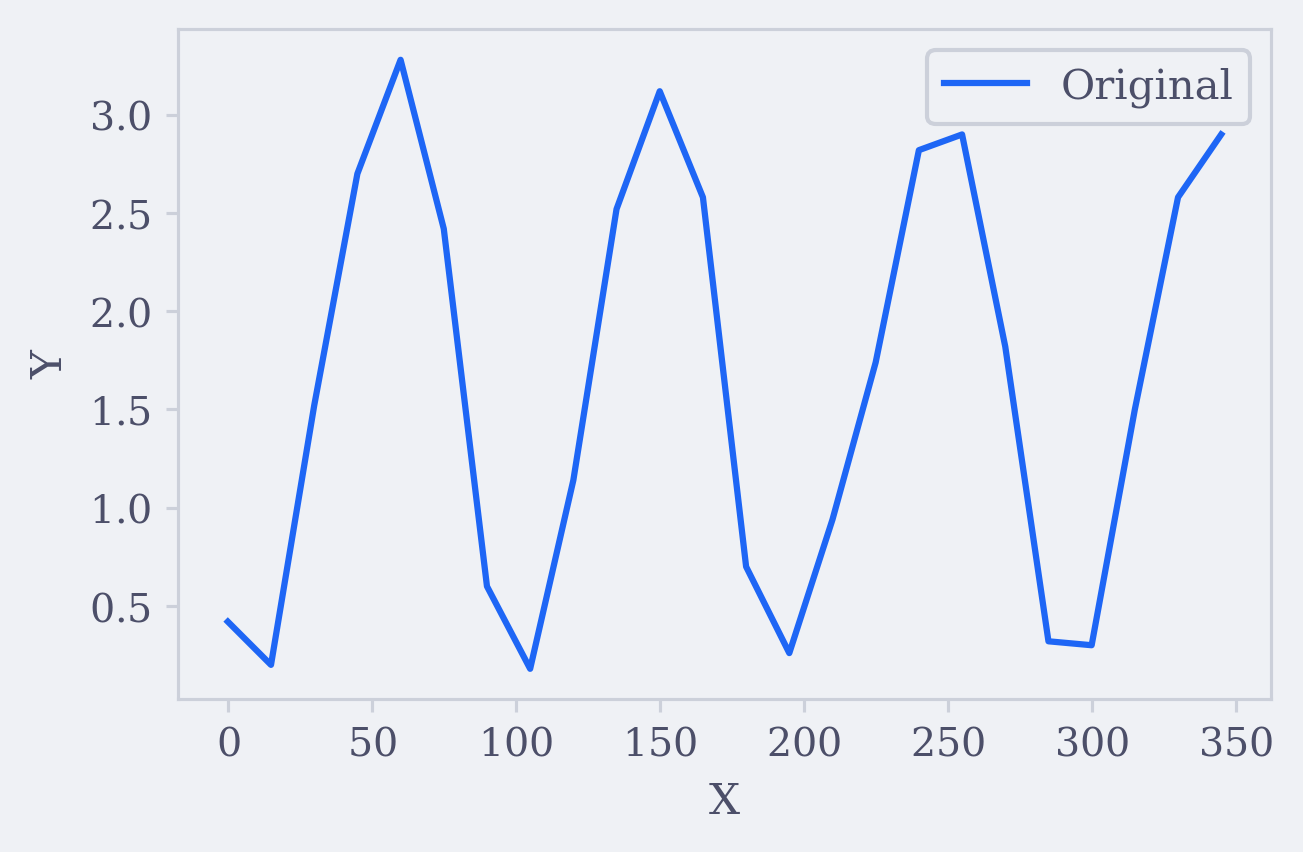

In [3]:
x2 = data[0].values[25:50]
y2 = data[1].values[25:50]
with ypu.temp_style(["ysy_academic", "catppuccin_latte"]):
    ypu.plot(x2, y2, 'Original')

In [4]:
x = x1 * np.pi / 180
y = y1

In [5]:
fs = 2 * np.pi / len(y)
fft_vals = np.fft.fft(y)
fft_freqs = np.fft.fftfreq(len(y), 1/fs)
positive_freqs = fft_freqs[:len(fft_vals)//2]
positive_magnitude = np.abs(fft_vals[:len(fft_vals)//2]) * 2 / len(y)  # 归一化

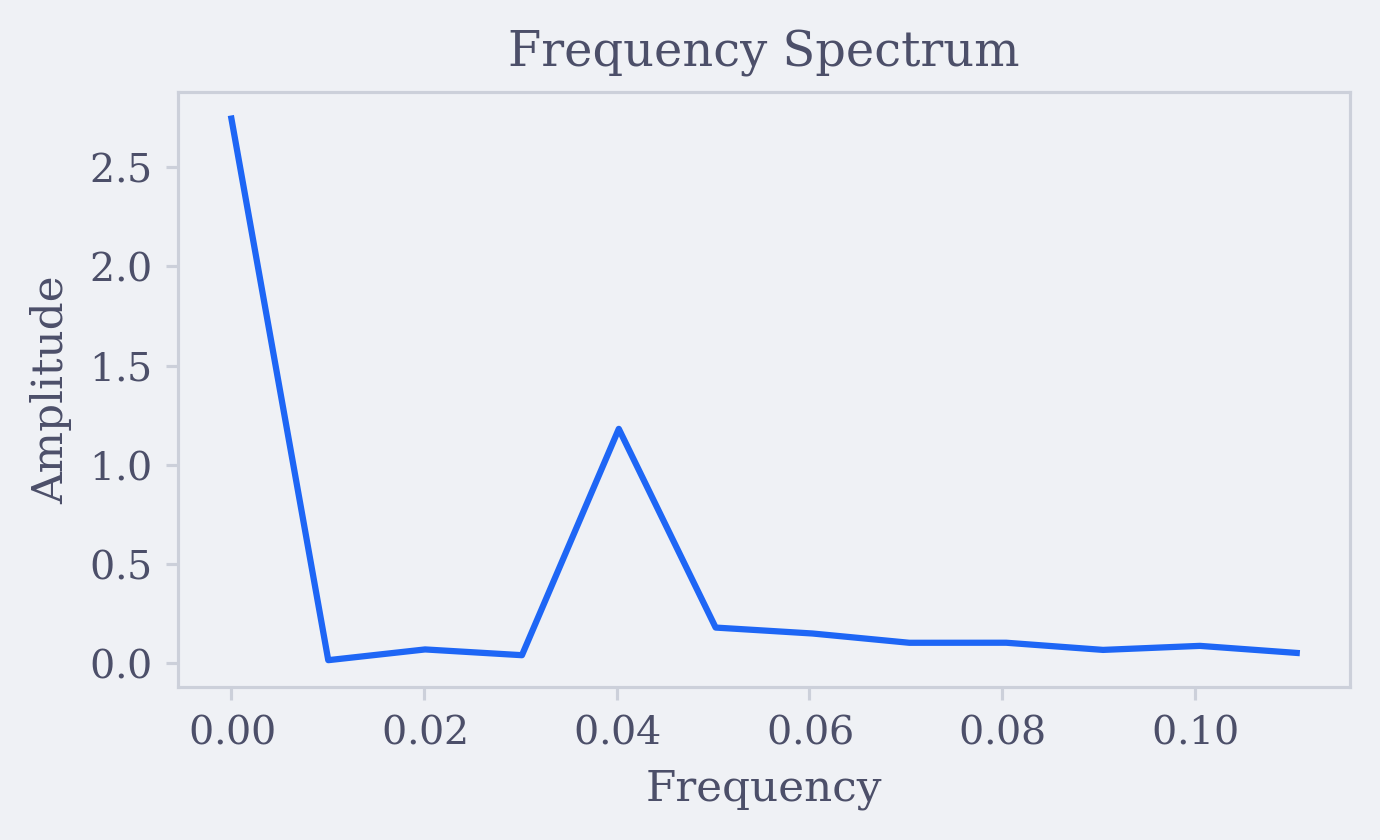

In [6]:
with ypu.temp_style(["ysy_academic", "catppuccin_latte"]):
    plt.figure()
    plt.plot(positive_freqs, positive_magnitude)
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

In [7]:
freqs = fft_freqs
half = len(y) // 2
freq_rad = freqs[:half]
mag = positive_magnitude
# 找主频
peak_idx = np.argmax(mag[1:]) + 1
main_freq = freq_rad[peak_idx]  # 每 2π 弧度中出现的周期数
estimated_period_rad = 2 * np.pi / main_freq

print(f"估计的周期 ≈ {estimated_period_rad:.3f} rad")


估计的周期 ≈ 156.250 rad


In [8]:
def model(x, A, omega, phi, C):
    return A * np.sin(omega * x + phi) + C

In [9]:
from scipy.optimize import curve_fit

initial_guess = [1.5, 4, 0, 1.5]
params, covariance = curve_fit(model, x, y, p0=initial_guess)
A_fit, omega_fit, phi_fit, C_fit = params
print(f"拟合参数：A={A_fit:.3f}, ω={omega_fit:.3f}, φ={phi_fit:.3f}, C={C_fit:.3f}")

拟合参数：A=1.218, ω=3.943, φ=-0.139, C=1.382


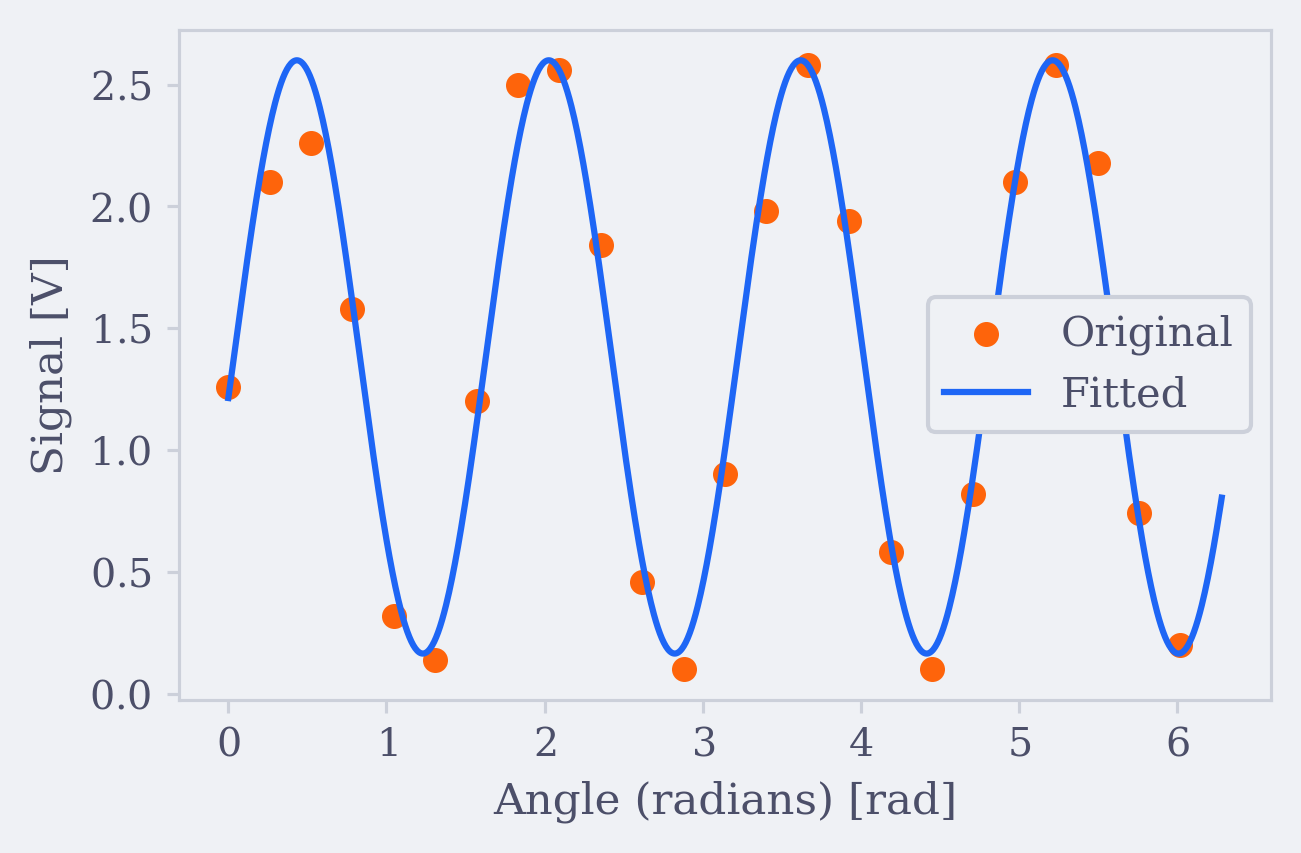

In [11]:
x_arr = np.linspace(np.min(x), np.max(x), 1000)

y_fit = model(x_arr, *params)

with ypu.temp_style(["ysy_academic", "catppuccin_latte"]):
    plt.scatter(x, y, color='C1', label='Original')
    plt.plot(x_arr, y_fit, label='Fitted')
    plt.legend()
    plt.xlabel("Angle (radians) [rad]")
    plt.ylabel("Signal [V]")
    plt.show()

In [13]:
# ==== 拟合效果报告 ====

# 拟合参数及其标准差
param_names = ['A', 'ω', 'φ', 'C']
param_errors = np.sqrt(np.diag(covariance))

print("\n=== 拟合参数 ===")
for name, value, error in zip(param_names, params, param_errors):
    print(f"{name:>2} = {value:.6f} ± {error:.6f}")

# 残差分析
residuals = y - model(x, *params)
rmse = np.sqrt(np.mean(residuals**2))
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

print("\n=== 残差分析 ===")
print(f"Mean of residuals: {mean_residual:.6e}")
print(f"Std of residuals : {std_residual:.6e}")
print(f"RMSE             : {rmse:.6e}")

# 拟合优度 R²
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

print("\n=== 拟合优度 ===")
print(f"R² = {r_squared:.6f}")



=== 拟合参数 ===
 A = 1.217590 ± 0.049880
 ω = 3.943445 ± 0.020722
 φ = -0.138968 ± 0.075250
 C = 1.382204 ± 0.034878

=== 残差分析 ===
Mean of residuals: -1.132894e-13
Std of residuals : 1.594824e-01
RMSE             : 1.594824e-01

=== 拟合优度 ===
R² = 0.966049
